False
X= [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
Y= [-1.36011263 -1.10552744 -1.419919   -1.20495739 -1.33978143 -0.71830716
 -0.58815781 -0.79981746 -0.42881019 -0.69801306 -0.47433279 -0.74976858
 -0.70662043 -0.70201994 -0.55250402 -0.29921736 -0.37004264  0.26285865
  0.19885989  0.66547573  0.58377993  0.82623317  0.93861127  1.40274136
  1.24020308  1.09740238  1.51986835  1.3590738   1.72102849  1.70177321]
X= [[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]]
Y= [-1.36011263 -

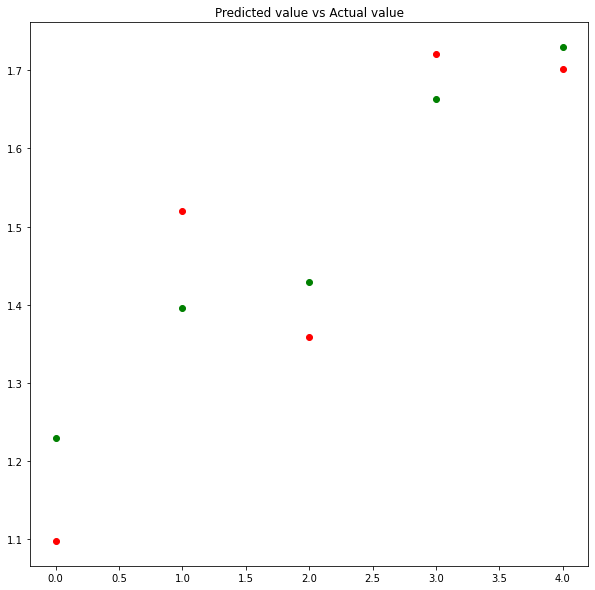

In [12]:
import pandas as pd
import numpy as np
def predict(thetaParam,bias, x_params):
    x_params=np.asarray(x_params)
    x_params=x_params.T
     
    ans=np.dot(thetaParam, x_params)+bias
    
    return ans

def feature_scaling(on_this_array):
  if(len(on_this_array.shape)==2):
    on_this_array=on_this_array.astype(np.double)
    for i in range(0, len(on_this_array[0])):
        meanValue=np.mean(on_this_array[:,i])
        stdValue=np.std(on_this_array[:,i])
        on_this_array[:,i]=(on_this_array[:,i]-meanValue)/stdValue
  else:
    meanValue=np.mean(on_this_array)
    stdValue=np.std(on_this_array)
    on_this_array[:]=(on_this_array[:]-meanValue)/stdValue
  return on_this_array

dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/emotionRec/Salary_Data.csv')
print(dataset.isnull().sum().all())
x=dataset.iloc[:,:-1].values
print("X=", x)
y=dataset.iloc[:,1].values
x=feature_scaling(x)
y=feature_scaling(y)
print("Y=", y)

'''
USING SKLEARN TO COMPARE THE RESULTS OBTAINED
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_train)

from sklearn.metrics import r2_score
r2score_hell=r2_score(y_train, y_pred)
print("r2 score for test set linear regression: ", r2score_hell)'''

x_train=np.asarray(x[0:24])
y_train=np.asarray(y[0:24])
 
print("X=", x_train)
print("Y=", y_train)

flag=0
theta=np.random.rand(x_train.shape[1])
 
bias=np.random.rand(1)
lambda_term=1.4
#This value of lambda got for r2 score of 0.907 on training set and r2 score of 0.845 on test set
x_train=x_train.T
m=x_train.shape[1]
alpha=0.1
cost_function_all=[]
while(True):
    flag=0
    step1=np.dot(theta,x_train)+bias
    #h(x)-y
    step2=step1-y_train
    step2=np.square(step2)
    #print("After squaring step2: ", step2)
    cost_function=np.sum(step2)
    #print("Cost function part 1: ", cost_function)
    cost_function=(cost_function)/(2*m)+lambda_term*(np.sum(np.square(theta)))/(2*m)
    cost_function_all.append(cost_function)
    #print("Cost function with R2 regularization term: ", cost_function)

    step3=np.dot(x_train, (step1-y_train))
    #print(step3)
    change_theta=theta*(1-(alpha*lambda_term)/m)-(alpha/m)*step3
    change_bias=bias-(alpha/m)*np.sum((step1-y_train))
    hold_array=np.abs(theta-change_theta)
    #print("change_theta=", change_theta)
    #print("change_bias=", change_bias)
    if(hold_array.any()>=1e-15):
        flag=1
    if(np.abs(bias-change_bias)>=1e-15):
        flag=1
        #print("Bias not correct, chnage_bias=", change_bias)
        #dummy=input("Enter to proceed")
    if(flag==0):
        print("Converged")
        break
    theta=change_theta
    bias=change_bias
    #dummy=input("Give input")
print("THETA=", theta)
print("BIAS=", bias)

x_test=x[25:]
y_test=y[25:]
#bias=bias-0.25
from sklearn.metrics import r2_score
r2score_hell=r2_score(y[25:], predict(theta,bias,x[25:]))
print("r2 score for test set linear regression: ", r2score_hell)

r2score_hell=r2_score(y[0:24], predict(theta,bias,x[0:24]))
print("r2 score for training set linear regression: ", r2score_hell)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Predicted value vs Actual value")
y_pred=predict(theta, bias, x_test)
plt.scatter(range(0, len(y_test)), y_test, color="red")
plt.scatter(range(0, len(y_pred)), y_pred, color="green")
plt.show()